Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Entrenando y evaluando clasificadores...

Resultados para SVM:
Precisión: 0.92
Matriz de Confusión:
[[88  1]
 [11 50]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           B       0.89      0.99      0.94        89
           M       0.98      0.82      0.89        61

    accuracy                           0.92       150
   macro avg       0.93      0.90      0.91       150
weighted avg       0.93      0.92      0.92       150


Resultados para Regresión Logística:
Precisión: 0.97
Matriz de Confusión:
[[89  0]
 [ 5 56]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        89
           M       1.00      0.92      0.96        61

    accuracy                           0.97       150
   macro avg       0.97      0.96      0.96       150
weig

<ipython-input-49-a8824586b0bf>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres, y=precisiones, palette="viridis")


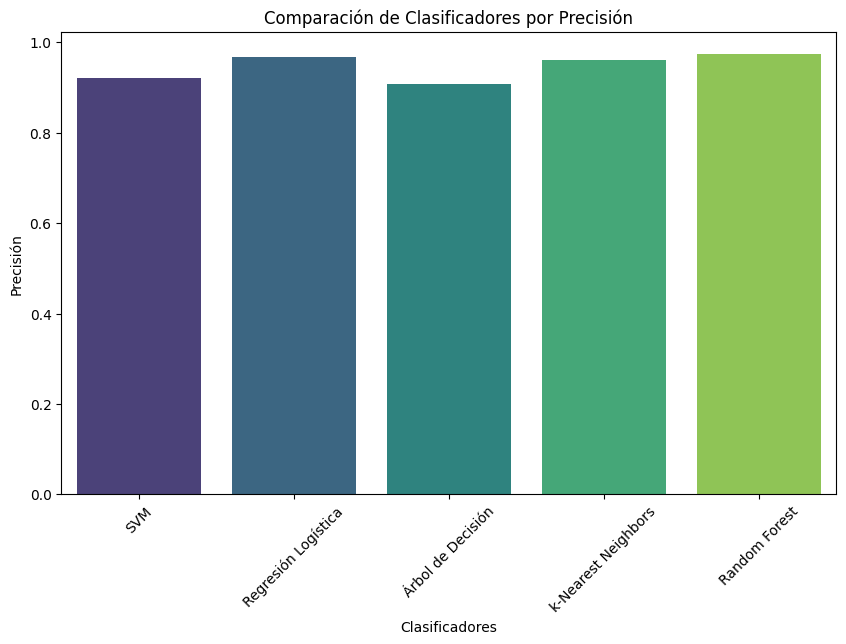


Exploración de Árbol de Decisión:
Profundidad 1: Precisión = 0.91
Profundidad 2: Precisión = 0.93
Profundidad 3: Precisión = 0.91
Profundidad 4: Precisión = 0.94
Profundidad 5: Precisión = 0.92
Profundidad 6: Precisión = 0.91
Profundidad 7: Precisión = 0.91
Profundidad 8: Precisión = 0.91
Profundidad 9: Precisión = 0.91
Profundidad 10: Precisión = 0.91


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class Clasificadores:
    """
    Clase para manejar los datos, entrenar y evaluar diferentes clasificadores.
    """
    def __init__(self, ruta_archivo):
      """
      Inicializa la clase Clasificadores con los datos del archivo cargado y
      verifica los datos de entremaniento y prueba

      Usamos los parametros:
          ruta_archivo (str): Ruta al archivo CSV que contiene los datos.
      Las exepciones valuan que el archivo no este vacio y que sea un archivo .csv
      """
      # Verificación la extencion cvs  y carga el archivo
      if not ruta_archivo.lower().endswith('.csv'):
          raise ValueError("El archivo debe ser un archivo .csv")
      try:
          df = pd.read_csv(ruta_archivo)
      except FileNotFoundError:
          raise FileNotFoundError(f"El archivo {ruta_archivo} no se encuentra.")
      except pd.errors.EmptyDataError:
          raise ValueError("El archivo CSV está vacío.")

      # Verifica que el archivo no este vacio
      if df.empty:
            raise ValueError("El archivo CSV no contiene datos.")

      # Verifica que el archivo contenga datos numericos
      if not np.all(df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').notnull()):
            raise ValueError("Las características deben ser numéricas.")
      # Asigna etiquetas y carcateristicas a los datos
      self.y = list(df["diagnosis"])
      self.x = np.array(df.iloc[:, 2:])

      # Divide los datos entrenamiento ruba asiganndo porcentejes
      self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.x, self.y, test_size=0.30, random_state=42
        )

       # Crea un diccionario de los clasifcadores que vamos a usar
      self.clasificadores = {
            'SVM': svm.SVC(),
            'Regresión Logística': LogisticRegression(max_iter=10000),
            'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
            'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
            'Random Forest': RandomForestClassifier(random_state=42)
        }

    def entrenar_evaluar(self):
      """
      Entrena a los clasificadores evaluando su rendimiento, imprime la
      presicion, la matriz de confusion y el reporte de clasificacion  de
      cada clasificacion
      devolviendo un diccionario con los resultados
      """
      resultados = {}
      # Entrena y evalua cada clasificador
      for nombre, clf in self.clasificadores.items():
          clf.fit(self.x_train, self.y_train)
          y_pred = clf.predict(self.x_test)

          # Calcula la presion, matriz de confucion y reprte de clasificacion
          accuracy = accuracy_score(self.y_test, y_pred)
          conf_matrix = confusion_matrix(self.y_test, y_pred)
          class_report = classification_report(self.y_test, y_pred)

          # Alamcena los resultados en el diccionario
          resultados[nombre] = {
                'Precisión': accuracy,
                'Matriz de Confusión': conf_matrix,
                'Reporte de Clasificación': class_report
          }

          print(f"\nResultados para {nombre}:")
          print(f"Precisión: {accuracy:.2f}")
          print("Matriz de Confusión:")
          print(conf_matrix)
          print("\nReporte de Clasificación:")
          print(class_report)

      return resultados

    def validacion_cruzada(self):
      """
      Valida cada clasificador evaluando la presicion y su desviacion estandar
      """
      print("\nValidación cruzada:")
      for nombre, clf in self.clasificadores.items():
          scores = cross_val_score(clf, self.x_train, self.y_train, cv=5)
          print(f"{nombre}: Precisión media = {scores.mean():.2f}, Desviación estándar = {scores.std():.2f}")

    def graficar_resultados(self, resultados):
      """
      Crea una grafica con todas las presiociones de los clasifcadores
      """
      nombres = list(resultados.keys())
      precisiones = [resultados[nombre]['Precisión'] for nombre in nombres]

      plt.figure(figsize=(10, 6))
      sns.barplot(x=nombres, y=precisiones, palette="viridis")
      plt.title("Comparación de Clasificadores por Precisión")
      plt.ylabel("Precisión")
      plt.xlabel("Clasificadores")
      plt.xticks(rotation=45)
      plt.show()

    def explorar_arbol_decision(self):
      """
      Evalua la presion analizando la profundidad de cada arbol de decision
      con profundidades (1-10)
      """
      print("\nExploración de Árbol de Decisión:")
      for depth in range(1, 11):
          clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
          clf.fit(self.x_train, self.y_train)
          y_pred = clf.predict(self.x_test)
          accuracy = accuracy_score(self.y_test, y_pred)
          print(f"Profundidad {depth}: Precisión = {accuracy:.2f}")

if __name__ == "__main__":
    try:
        ruta_archivo = "/content/drive/MyDrive/programacion /cancer.csv"
        clasificadores = Clasificadores(ruta_archivo)

        print("\nEntrenando y evaluando clasificadores...")
        resultados = clasificadores.entrenar_evaluar()

        clasificadores.validacion_cruzada()

        clasificadores.graficar_resultados(resultados)

        clasificadores.explorar_arbol_decision()

    except ValueError as e:
        print(f"Error de valor: {e}")
    except FileNotFoundError as e:
        print(f"Error de archivo no encontrado: {e}")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")
